In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as files:
    files.extractall()
    print('The datatset has been extracted')

The datatset has been extracted


In [4]:
#extracting the training set
from zipfile import ZipFile
dataset = 'train.zip'

with ZipFile(dataset, 'r') as files:
    files.extractall()
    print('The training set has been extracted')

The training set has been extracted


In [5]:
import os
#counting the no. of files in training set

path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('No. of images in training set: ', file_count)

No. of images in training set:  25000


In [6]:
#Printing the name of images:
#Dogs and cats are present in same folder in this case, could be in
#different folders in other datasets

image_files = os.listdir('train')
print(image_files)

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg', 'cat.3406.jpg', 'dog.1753.jpg', 'cat.4369.jpg', 'cat.7660.jpg', 'dog.5535.jpg', 'cat.8553.jpg', 'cat.9895.jpg', 'cat.1211.jpg', 'dog.3144.jpg', 'dog.775.jpg', 'dog.11102.jpg', 'cat.6218.jpg', 'dog.11664.jpg', 'dog.3622.jpg', 'cat.1577.jpg', 'cat.12020.jpg', 'dog.5253.jpg', 'cat.7106.jpg', 'cat.8235.jpg', 'cat.952.jpg', 'dog.9469.jpg', 'dog.1035.jpg', 'cat.3360.jpg', 'cat.11529.jpg', 'cat.10637.jpg', 'dog.6982.jpg', 'dog.8777.jpg', 'dog.7444.jpg', 'cat.5711.jpg', 'cat.946.jpg', 'cat.3374.jpg', 'dog.1021.jpg', 'dog.6996.jpg', 'cat.10623.jpg', 'dog.8763.jpg', 'cat.5705.jpg', 'dog.7450.jpg', 'dog.12379.jpg', 'dog.11670.jpg', 'dog.4159.jpg', 'cat.1563.jpg', 'dog.3636.jpg', 'cat.12034.jpg', 'dog.2528.jpg', 'cat.7112.jpg', 'dog.5247.jpg', 'cat.8221.jpg', 'dog.10208.jpg', 'dog.5521.jpg', 'cat.7674.jpg', 'cat.8547.jpg', 'cat.9881.jpg', 'dog.761.jpg', 'dog.3150.jpg', 'cat.1205.jpg', 'dog.11116.jpg', 'cat.9659.jpg',

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

print('done')

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.10 from "/Users/faizannaseer/opt/anaconda3/envs/tensorflow/bin/python"
  * The NumPy version is: "1.23.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/faizannaseer/.local/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so, 0x0002): tried: '/Users/faizannaseer/.local/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/usr/local/lib/_multiarray_umath.cpython-310-darwin.so' (no such file), '/usr/lib/_multiarray_umath.cpython-310-darwin.so' (no such file)


In [8]:
#Displaying images in training set

## displaying dog image
img = mpimg.imread('train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

NameError: name 'mpimg' is not defined

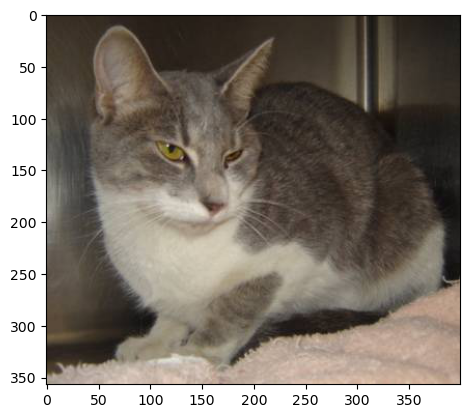

In [8]:
## displaying cat image
img = mpimg.imread('train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()
# all images are of different size

In [9]:
#Resize all the images
no_of_dogs = 0
no_of_cats = 0
for image in image_files:
    if 'dog' in image:
        no_of_dogs += 1
    else:
        no_of_cats += 1
print('Number of dog images: ', no_of_dogs)
print('Number of cat images: ', no_of_cats)

Number of dog images:  12500
Number of cat images:  12500


In [10]:
##Create a directory for resized images
os.mkdir('resized_images')
original_folder = 'train'
resized_folder = 'resized_images'

#extract only 1500
for i in range(1500):
    img_path = original_folder + '/' + os.listdir(original_folder)[i]
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder + '/' + os.listdir(original_folder)[i]
    img.save(newImgPath)

FileExistsError: [Errno 17] File exists: 'resized_images'

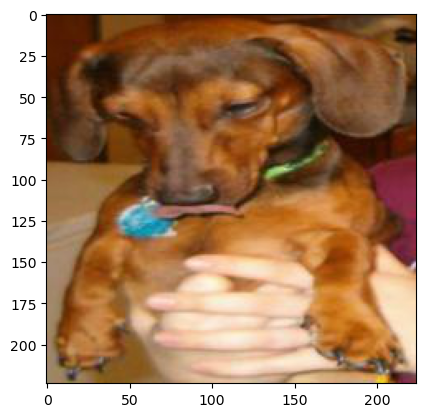

In [11]:
## displaying resized dog image
img = mpimg.imread('resized_images/dog.1790.jpg')
imgplt = plt.imshow(img)
plt.show()

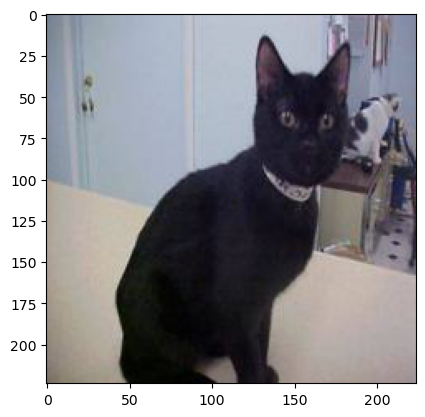

In [12]:
## displaying resized cat image
img = mpimg.imread('resized_images/cat.3200.jpg')
imgplt = plt.imshow(img)
plt.show()
#all images are of same size now

In [13]:
#Label cat and dog resized images (dogs to false, cats to true)

labels = []
resized_images_file = os.listdir('resized_images')
for image_name in resized_images_file:
    if 'dog' in image_name:
        labels.append(1)
    else:
        labels.append(0)

In [14]:
print(labels[0:5])
print(resized_images_file[0:5])
print(len(labels), len(resized_images_file))

[1, 0, 1, 0, 0]
['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg']
1500 1500


In [15]:
#counting the images of dogs and cats out of 1500 images

values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

#Check if dog and cat images are of similar count, if not create for 
# loop to make sure they are.
#Here if code doesnt work you'll have to use for loop on boolean values
# to count else convert boolean to 1 and 0 above.
#764 dogs, 736 cats - pretty equal

[0 1]
[736 764]


In [17]:
# convert image to arrays for image processing
!pip install opencv-python
import cv2
import glob
print('done')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 MB 13.6 MB/s eta 0:00:0000:0100:01
done


In [19]:
resized_images_directory = 'resized_images'
resized_images_extension = ['png','jpg'] # can take out png if no png
files = []

[files.extend(glob.glob(resized_images_directory + '/*.' + e)) for e in resized_images_extension]

cats_and_dogs = np.asarray([cv2.imread(file) for file in files])


In [20]:
print(cats_and_dogs)

[[[[ 53  36  23]
   [ 43  26  13]
   [ 50  34  18]
   ...
   [231 190 165]
   [232 192 167]
   [233 193 168]]

  [[ 49  32  19]
   [ 39  22   9]
   [ 45  28  15]
   ...
   [232 191 166]
   [233 193 168]
   [234 194 169]]

  [[ 45  27  16]
   [ 36  18   7]
   [ 43  25  14]
   ...
   [231 190 165]
   [233 192 169]
   [232 194 170]]

  ...

  [[ 58  32  26]
   [ 62  36  29]
   [ 64  41  33]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]

  [[ 61  32  28]
   [ 60  34  28]
   [ 60  36  30]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]

  [[ 61  32  28]
   [ 56  29  25]
   [ 55  29  23]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]]


 [[[154 119  53]
   [149 114  41]
   [147 112  32]
   ...
   [172 115  46]
   [184 118  37]
   [194 123  36]]

  [[159 123  59]
   [152 116  46]
   [148 113  33]
   ...
   [178 119  49]
   [185 119  38]
   [193 122  34]]

  [[162 125  63]
   [154 117  49]
   [150 114  38]
   ...
   [181 124  49]
   [185 120  35]
   [192 122

In [21]:
type(cats_and_dogs)

numpy.ndarray

In [22]:
print(cats_and_dogs.shape)

(1500, 224, 224, 3)


In [23]:
X = cats_and_dogs
y = np.asarray(labels)

In [24]:
#train test split, random state means same split each time instead of diffy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)
# training: 1200, test: 300

(1500, 224, 224, 3) (1200, 224, 224, 3) (300, 224, 224, 3)


In [26]:
# scaling the data (find out why it was scaled)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [10]:
# Building the neural network

import tensorflow as tf
import tensorflow_hub as hub

2023-01-11 02:18:11.473681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.10 from "/Users/faizannaseer/opt/anaconda3/envs/tensorflow/bin/python"
  * The NumPy version is: "1.23.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/faizannaseer/.local/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so, 0x0002): tried: '/Users/faizannaseer/.local/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/usr/local/lib/_multiarray_umath.cpython-310-darwin.so' (no such file), '/usr/lib/_multiarray_umath.cpython-310-darwin.so' (no such file)


In [ ]:
# can research on this dataset, and model, and see if you can create on your own
# probs cant cuz huge dataset
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape(224, 224, 3), trainable = False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

#Understand what every line means through the internet

In [ ]:
# find out what epoch is
model.fit(X_train_scaled, y_train, epochs=5)

# can save the model with the other video

In [ ]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test loss: ', score)
print('Test accuracy: ', accuracy)

In [ ]:
# Predicting new image

input_img_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_img_path)
cv2_imshow(input_image) #google.colab function altho dont rlly need
input_resized_image = cv2.resize(input_image, (224, 224)) #can use plt too, this is also google.colab
input_scaled_resized_image = input_resized_image/255
reshaped_imaged = np.reshape(input_scaled_resized_image, [1, 224, 224, 3]) #1 is showing only one image is being passed
input_prediction = model.predict(reshaped_image) # gives e.g. [0.85, 0.15]
input_pred_label = np.argmax(input_prediction) #tells what probs is max

In [ ]:
print(input_prediction)
print(input_pred_label)
if input_pred_label == True:
    print('cat')
else:
    print('dog')